**RIESGO DE SALUD MENTAL - MODELOS DE CLASIFICACION**   

El objetivo de este análisis es evaluar el riesgo de salud mental. Se van a utilizar dos algoritmos de clasificación (KNN y Árbol de Decisión), tomando como predictores principales la ansiedad y la depresión, para comparar cuál de los dos se ajusta mejor a los datos y permite identificar quiénes podrían tener mayor riesgo.

In [14]:
# Importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.plotting import plot_decision_regions
from sklearn.tree import DecisionTreeClassifier 
from sklearn.tree import plot_tree 

# Carga del Dataset
df = pd.read_csv("salud_mental.csv")



**MODELO DE CLASIFICACION - K-Nearest Neighbors (KNN)**  

In [15]:
# Variable predictora y objetivo
X = df[['depression_score', 'anxiety_score']].to_numpy()
y = df['mental_health_risk'].map({'Low':0, 'Medium':1, 'High':2}).to_numpy()

# Crear la instancia del modelo
clf = KNeighborsClassifier(n_neighbors=5)

# Entrenar el modelo
clf.fit(X, y)



KNeighborsClassifier()

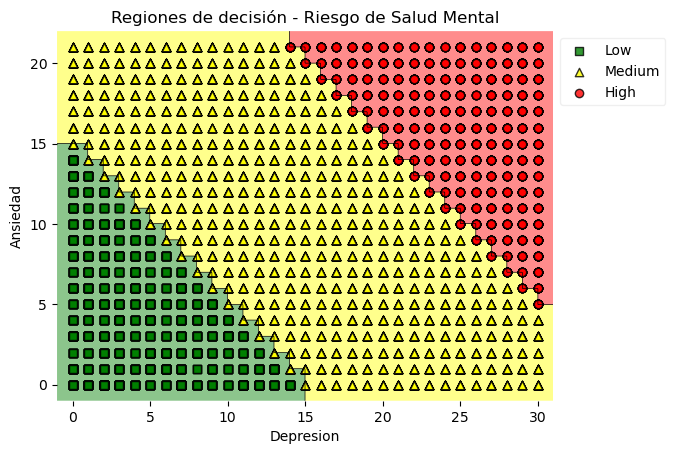

In [16]:
# Graficar regiones de decisión
ax = plot_decision_regions(X, y, clf=clf, colors='green,yellow,red')
plt.xlabel('Depresion')
plt.ylabel('Ansiedad')
plt.title('Regiones de decisión - Riesgo de Salud Mental')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['Low', 'Medium', 'High'],
          loc='upper left',          
          bbox_to_anchor=(1, 1),     
          framealpha=0.3,
          scatterpoints=1)

plt.show()



**MODELO CLASIFICACION - ARBOL DE DECISION**   


In [17]:
# Variable predictora y objetivo
X = df[['depression_score', 'anxiety_score']]
y = df['mental_health_risk'].map({'Low':0, 'Medium':1, 'High':2})

# Crear la instancia del modelo
clf = DecisionTreeClassifier(max_leaf_nodes=9)

# Entrenar el modelo
clf.fit(X, y)


DecisionTreeClassifier(max_leaf_nodes=9)

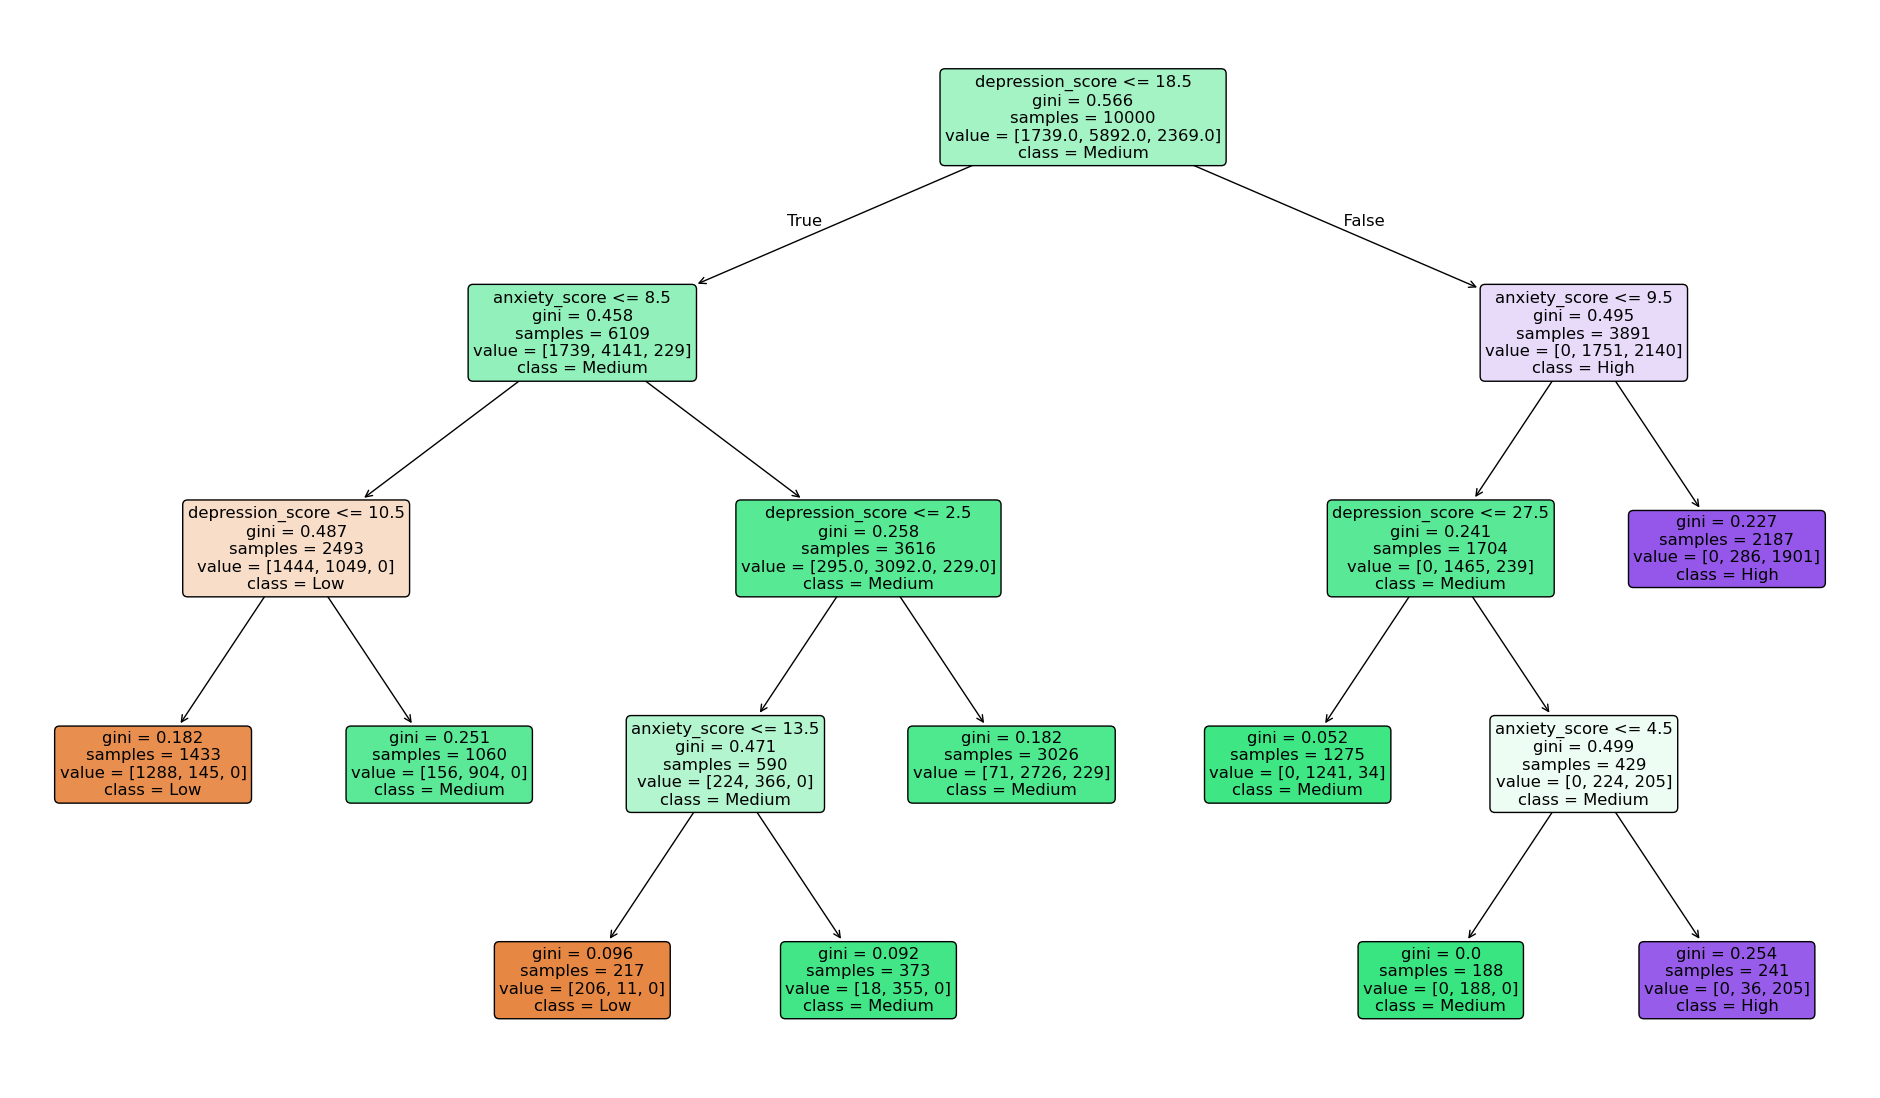

In [18]:
#Graficar Arbol de decision
plt.figure(figsize=(24,14))
plot_tree(clf, 
          feature_names=X.columns, 
          class_names=['Low','Medium','High'], 
          filled=True, 
          rounded=True)
plt.show()

**CONCLUSION**  


El modelo de KNN logra una mejor predicción del riesgo de salud mental, porque se adapta mejor a los límites entre ansiedad y depresión, mostrando regiones más precisas. Sin embargo, el árbol de decisión resulta más fácil de interpretar, ya que deja claro que la depresión es la variable más importante y cómo influye junto con la ansiedad en el nivel de riesgo.